In [135]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as pylt
import seaborn as sns
from scipy.stats import *
import math

# warning fixed for Soal 06
plt.rcParams.update({'figure.max_open_warning': 0})

# Pembacaan csv ke dalam variabel data
# Baris pertama tidak dijadikan header
datacsv = pd.read_csv("Gandum.csv", names=["Daerah", "SumbuUtama", "SumbuKecil", "Keunikan", "AreaBulatan", "Diameter", "KadarAir", "Keliling", "Bulatan", "Ransum", "Kelas"])
datacsv

,Daerah,SumbuUtama,SumbuKecil,Keunikan,AreaBulatan,Diameter,KadarAir,Keliling,Bulatan,Ransum,Kelas
1,5781,128.288875,58.470846,0.890095,5954,85.793926,0.674090,316.756,0.724041,2.194066,1
2,4176,109.348294,49.837688,0.890098,4277,72.918093,0.596231,260.346,0.774227,2.194088,1
3,4555,114.427991,52.151207,0.890105,4706,76.155145,0.776641,279.606,0.732159,2.194158,1
4,4141,108.701191,49.457349,0.890499,4236,72.611879,0.633180,260.478,0.766960,2.197877,1
5,5273,122.747869,55.757848,0.890876,5431,81.937733,0.669842,302.730,0.723031,2.201446,1
...,...,...,...,...,...,...,...,...,...,...,...
496,5083,120.083450,54.821580,0.889709,5179,80.447975,0.534827,286.377,0.778850,2.190441,2
497,4432,112.367050,51.294914,0.889726,4550,75.119889,0.601194,270.823,0.759344,2.190608,2
498,5020,119.873742,54.718545,0.889740,5104,79.947874,0.528421,285.799,0.772311,2.190733,2
499,4035,107.311728,48.930802,0.889996,4150,71.676506,0.584698,258.503,0.758791,2.193132,2


In [58]:
# Soal 1
# Mendapatkan nilai countnya 
# kemudian cari max dari count yang didapat tadi
# setelah nilai didapat ditambahkan ke dalam array modus
modus = []
for line in datacsv:
    modus.append(datacsv[line].value_counts().idxmax())

data = datacsv.describe().T
data["median"] = data["50%"]
data["modus"] = modus
data["variansi"] = datacsv.var()
data["range"] = datacsv.max() - datacsv.min()
data["skewness"] = datacsv.skew()
data["kurtosis"] = datacsv.kurt()
data

[4881, 99.01478925, 53.17603697, 0.90928407, 3802, 78.83325579, 0.824404762, 202.456, 0.7556490159999999, 1.901437269, 2]


,count,mean,std,min,25%,50%,75%,max,median,modus,variansi,range,skewness,kurtosis
Daerah,500.0,4801.246000,986.395491,2522.000000,4042.750000,4735.000000,5495.500000,7453.000000,4735.000000,4881.000000,9.729761e+05,4931.000000,0.238144,-0.434631
SumbuUtama,500.0,116.045171,18.282626,74.133114,104.116098,115.405140,129.046792,227.928583,115.405140,99.014789,3.342544e+02,153.795469,0.761529,4.330534
SumbuKecil,500.0,53.715246,4.071075,39.906517,51.193576,53.731199,56.325158,68.977700,53.731199,53.176037,1.657365e+01,29.071182,-0.010828,0.475568
Keunikan,500.0,0.878764,0.036586,0.719916,0.863676,0.890045,0.907578,0.914001,0.890045,0.909284,1.338528e-03,0.194085,-1.623472,2.917256
AreaBulatan,500.0,4937.048000,1011.696255,2579.000000,4170.250000,4857.000000,5654.250000,7720.000000,4857.000000,3802.000000,1.023529e+06,5141.000000,0.257560,-0.409685
Diameter,500.0,77.771158,8.056867,56.666658,71.745308,77.645277,83.648598,97.413830,77.645277,78.833256,6.491311e+01,40.747172,0.002725,-0.466455
KadarAir,500.0,0.648372,0.094367,0.409927,0.572632,0.626117,0.726633,0.878899,0.626117,0.824405,8.905149e-03,0.468972,0.493661,-0.740326
Keliling,500.0,281.479722,37.335402,197.015000,255.883000,280.045500,306.062500,488.837000,280.045500,202.456000,1.393932e+03,291.822000,0.733627,2.272685
Bulatan,500.0,0.761737,0.061702,0.174590,0.731991,0.761288,0.796361,0.904748,0.761288,0.755649,3.807194e-03,0.730158,-3.599237,29.975096
Ransum,500.0,2.150915,0.249767,1.440796,1.983939,2.193599,2.381612,2.464809,2.193599,1.901437,6.238350e-02,1.024013,-0.658188,-0.428656


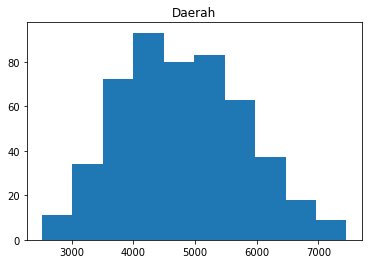

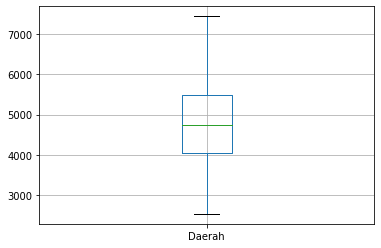

In [39]:
# Soal 2
# Daerah
pylt.figure()

# Histogram
pylt.hist(datacsv["Daerah"])
pylt.title("Daerah")
pylt.show()

# Box Plot
datacsv.boxplot(["Daerah"])
pylt.show()

*** 
Dengan memerhatikan box plot, dapat disimpulkan bahwa distribusi frekuensi dari data daerah gandum ini tidak simetris. Selain itu, dengan memerhatikan histogram, dapat disimpulkan bahwa frekuensi gandum lebih tinggi di bawah mean.
***
Data ini memiliki bentuk *negative skew*. Ini berarti bahwa mayoritas gandum memiliki nilai daerah di bawah rata-rata. Dalam kondisi praktis, jika nilai daerah berupa daerah asal produsen, maka ini menunjukkan bahwa mayoritas gandum berasal dari daerah yang sama atau berdekatan.

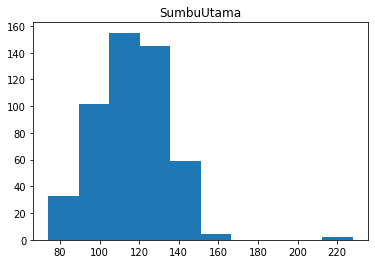

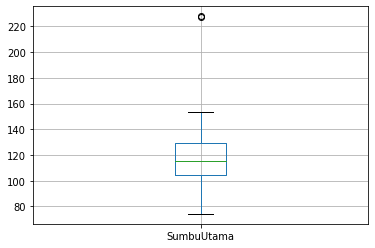

In [40]:
# SumbuUtama
pylt.figure()

# Histogram
pylt.hist(datacsv["SumbuUtama"])
pylt.title("SumbuUtama")
pylt.show()

# Box Plot
datacsv.boxplot(["SumbuUtama"])
pylt.show()

*** 
Dengan memerhatikan box plot, dapat disimpulkan bahwa distribusi frekuensi dari sumbu utama gandum itu tidak simetris dengan nilai outlier. Selain itu, dengan memerhatikan histogram, dapat disimpulkan bahwa frekuensi data lebih tinggi di bawah mean.
***
Data ini menunjukkan bahwa ada *negative skew* dari data sumbu utama. Ini berarti bahwa mayoritas dari gandum memiliki nilai sumbu utama yang lebih kecil dari rata-rata. Dalam kondisi praktis, ini menandakan bahwa ada inkonsitensi atau bahkan defisiensi dalam pertumbuhan atau *processing* gandum.

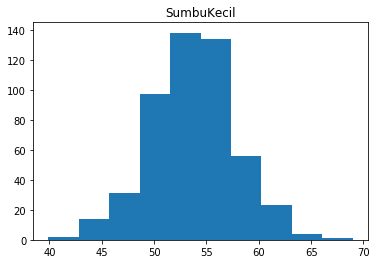

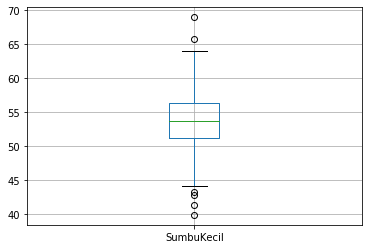

In [41]:
# SumbuKecil
pylt.figure()

# Histogram
pylt.hist(datacsv["SumbuKecil"])
pylt.title("SumbuKecil")
pylt.show()

# Box Plot
datacsv.boxplot(["SumbuKecil"])
pylt.show()

*** 
Dengan memerhatikan box plot, dapat disimpulkan bahwa distribusi frekuensi dari data sumbu kecil gandum itu simetris dengan beberapa outlier. Selain itu, dengan memerhatikan histogram, dapat disimpulkan bahwa frekuensi data lebih tinggi di sekitar mean.
***
Data sumbu kecil gandum ini memiliki simetri yang sangat tinggi dengan mayoritas gandum memiliki diamter di sekitar median dan mean memberikan indikasi bahwa distribusi frekuensi memiliki bentuk *peaked symmetry*. Untuk menentukan apakah data ini memiliki distribusi normal, perlu dilakukan *normality test*. Selain itu, *trend* dari histogram menunjukkan bahwa data outlier box plot itu konsisten dengan gandum lain dalam data. Dalam kondisi praktis, ini menunjukkan bahwa ada konsistensi dari proses pertumbuhan atau *processing* gandum sehingga rata-rata sumbu-kecil gandum tidak jauh dari median. 

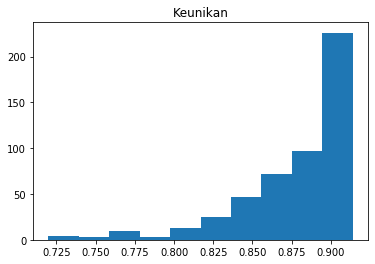

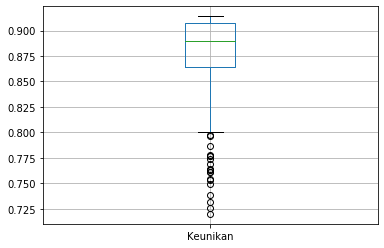

In [42]:
# Keunikan
pylt.figure()

# Histogram
pylt.hist(datacsv["Keunikan"])
pylt.title("Keunikan")
pylt.show()

# Box Plot
datacsv.boxplot(["Keunikan"])
pylt.show()

***
Dengan memerhatikan box plot, dapat disimpulkan bahwa distribusi frekuensi dari keunikan gandum itu tidak simetris. Selain itu, dengan memerhatikan histogram, dapat disimpulkan bahwa mayoritas data memiliki keunikan di atas mean.
***
Data ini menunjukkan bahwa mayoritas gandum memiliki keunikan yang sangat tinggi. Walaupun box plot menunjukkan bahwa ada banyak data outlier, pada kenyataannya histogram menunjukkan bahwa ada sebuah *trend* dari keunikan yang menjelaskan data-data outlier tersebut. Histogram menunjukkan data memiliki bentuk *J shape*. Dalam kondisi praktis, *J Shape* ini dapat menandakan satu dari dua kemungkinan: Bahwa keunikan dari gandum sudah cukup tinggi (hal ini bisa diinginkan atau perlu ditindak ulang, tindakan dapat merujuk ke standar produsen) atau perlu ada asesmen ulang dalam pemberian nilai keunikan sehingga data dapat merefleksikan kondisi aktual dengan lebih baik.

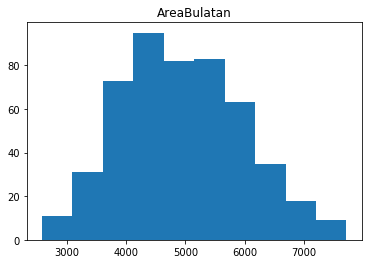

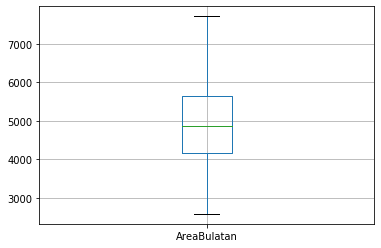

In [43]:
# AreaBulatan
pylt.figure()

# Histogram
pylt.hist(datacsv["AreaBulatan"])
pylt.title("AreaBulatan")
pylt.show()

# Box Plot
datacsv.boxplot(["AreaBulatan"])
pylt.show()

*** 
Dengan memerhatikan box plot, dapat disimpulkan bahwa distribusi frekuensi dari area gandum itu tidak simetris. Selain itu, dengan memerhatikan histogram, dapat disimpulkan bahwa frekuensi data ini memiliki *negative skew*.
***
Dalam kondisi seperti ini, mayoritas gandum memiliki area yang lebih kecil daripada rata-rata. Bias ukuran ini dapat datributkan kepada berbagai faktor, seperti keunikan, perbedaan diameter, atau perbedaan dalam kualitas kebulatan. Dalam kondisi praktis, data ini menandakan bahwa ada defisiensi atau kekurangan dalam pertumbuhan atau *processing* gandum sehingga mayoritas gandum memiliki area yang lebih kecil dari rata-rata.

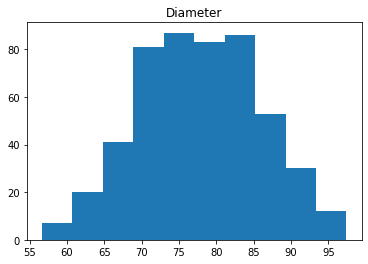

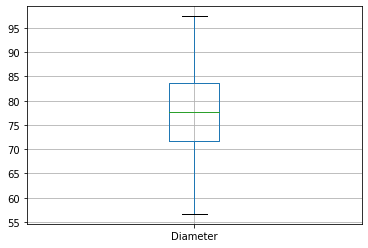

In [44]:
# Diameter
pylt.figure()

# Histogram
pylt.hist(datacsv["Diameter"])
pylt.title("Diameter")
pylt.show()

# Box Plot
datacsv.boxplot(["Diameter"])
pylt.show()

*** 
Dengan memerhatikan box plot, dapat disimpulkan bahwa distribusi frekuensi dari diameter gandum itu simetris. Selain itu, dengan memerhatikan histogram, dapat disimpulkan bahwa frekuensi diameter lebih tinggi di sekitar median.
***
Data diameter gandum ini memiliki simetri yang sangat tinggi dengan mayoritas gandum memiliki diamter di sekitar median dan mean memberikan indikasi bahwa distribusi frekuensi memiliki bentuk *peaked symmetry*. Untuk menentukan apakah data ini memiliki distribusi normal, perlu dilakukan *normality test*. Dalam kondisi praktis, ini menunjukkan bahwa ada konsistensi dari proses pertumbuhan atau *processing* gandum sehingga rata-rata diameter gandum tidak jauh dari median.

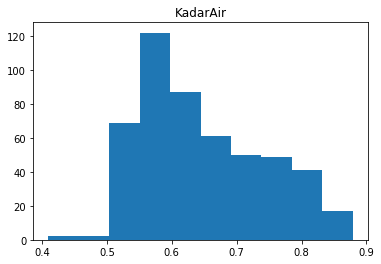

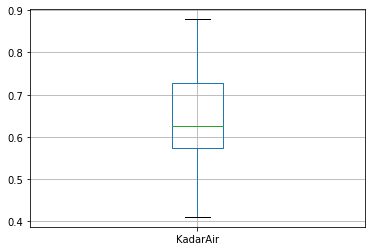

In [45]:
# KadarAir
pylt.figure()

# Histogram
pylt.hist(datacsv["KadarAir"])
pylt.title("KadarAir")
pylt.show()

# Box Plot
datacsv.boxplot(["KadarAir"])
pylt.show()

***
Dengan memerhatikan box plot, dapat disimpulkan bahwa distribusi frekuensi dari kadar air gandum itu tidak simetris. Selain itu, dengan memerhatikan histogram, dapat disimpulkan bahwa frekuensi keliling memiliki *negative skew*.
***
Dari kondisi ini, dapat kita nyatakan bahwa mayoritas gandum memiliki kadar air di bawah rata-rata. Kondisi seperti ini dapat terjadi karena minoritas gandum memiliki kadar air berlebih yang "menarik" rata-rata. Dalam kondisi praktis, ini dapat menunjukkan kesenjangan dan/atau defisiensi dalam perairan dan pertumbuhan beberapa populasi gandum.

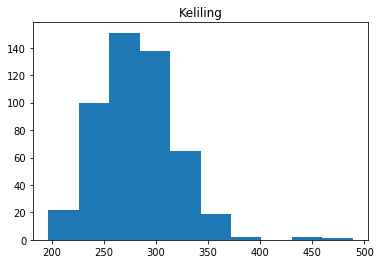

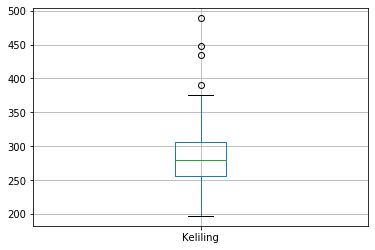

In [46]:
# Keliling
pylt.figure()

# Histogram
pylt.hist(datacsv["Keliling"])
pylt.title("Keliling")
pylt.show()

# Box Plot
datacsv.boxplot(["Keliling"])
pylt.show()

*** 
Dengan memerhatikan box plot, dapat disimpulkan bahwa distribusi frekuensi dari keliling gandum itu tidak simetris. Selain itu, dengan memerhatikan histogram, dapat disimpulkan bahwa frekuensi keliling memiliki *negative skew*.
***
Skew yang dimiliki oleh data ini adalah *negative skew* yang berarti bahwa mayoritas gandum memiliki keliling yang lebih kecil daripada rata-ratanya. Rata-rata ini "ditarik ke atas" oleh minoritas data dengan nilai tinggi. Data gandum ini juga memiliki outlier data keliling di luar batasan 1.5x Interquartile Range dari ujung box. Data outlier ini juga memiliki dampak pada "penarikan rata-rata" yang menghasilkan skew. Perbedaan data keliling dengan data diameter dapat diatributkan ke beberapa faktor, seperti perbedaan kebulatan pada gandum. Dalam kondisi praktis, data ini dapat menunjukkan bahwa ada kekurangan dalam kondisi pertanian *processing* sehingga sebagian besar gandum tumbuh dengan ukuran dan keliling yang lebih kecil dari populasi minoritas lain.

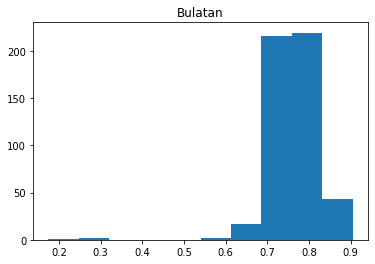

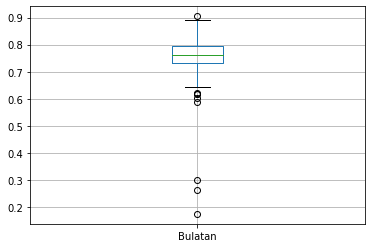

In [47]:
# Bulatan
pylt.figure()

# Histogram
pylt.hist(datacsv["Bulatan"])
pylt.title("Bulatan")
pylt.show()

# Box Plot
datacsv.boxplot(["Bulatan"])
pylt.show()

***
Dengan memerhatikan box plot, dapat disimpulkan bahwa distribusi frekuensi dari kebulatan gandum itu tidak simetris dengan beberapa data outlier. Selain itu, dengan memerhatikan histogram, dapat disimpulkan bahwa frekuensi gandum memiliki skew.
***
Walaupun skew yang dimiliki histogram memiliki tampilan *negative skew*, ini adalah hasil dari ukuran histogram yang mengakomodasi outlier. Jika kita menghilangkan outlier dan meningkatkan detail histogram sebagai berikut:

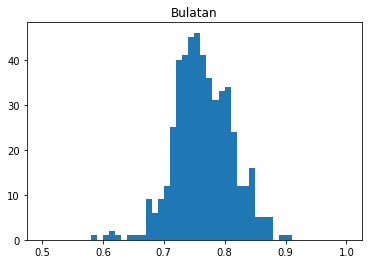

In [48]:
# Histogram Tanpa Outlier (Detailed)
pylt.figure()

pylt.hist(datacsv["Bulatan"], range = [0.5, 1.0], bins=50)
pylt.title("Bulatan")
pylt.show()

Akan terlihat bahwa sebenarnya data kebulatan gandum memiliki *positive skew*, yang berarti bahwa mayoritas gandum memiliki kebulatan di bawah mean keseluruhan data. Namun, karena hanya perbedaan antara median dan mean sedikit, maka data memiliki bentuk yang hampir simetris. Dalam kondisi praktis, data ini menunjukkan bahwa mayoritas gandum memiliki kebulatan di sekitar rata-rata dengan kecenderungan terhadap di bawah rata-rata. Ini dapat menandakan bahwa kualitas pertumbuhan dan/atau *processing* gandum memiliki kualitas yang konsisten dengan beberapa outlier di bawah standar kualitas, tetapi konsistensinya masih bisa ditingkatkan.

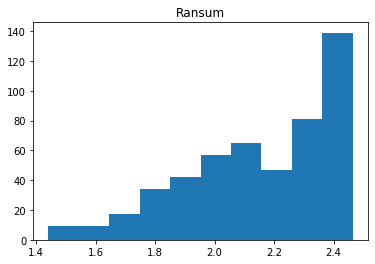

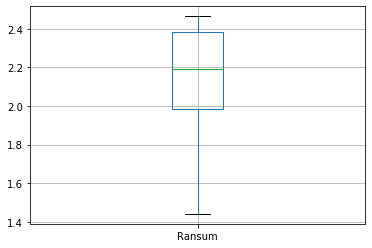

In [49]:
# Ransum
pylt.figure()

# Histogram
pylt.hist(datacsv["Ransum"])
pylt.title("Ransum")
pylt.show()

# Box Plot
datacsv.boxplot(["Ransum"])
pylt.show()

***   
Dengan memerhatikan box plot, dapat disimpulkan bahwa distribusi frekuensi dari ransum tidak simetris. Selain itu, dengan memerhatikan histogram, dapat disimpulkan bahwa mayoritas gandum memiliki nilai ransum yang lebih dari mean. 
***
Distribusi frekuensi seperti yang ditunjukkan dalam histogram ini menunjukkan bahwa mayoritas dari gandum memiliki nilai ransum yang tinggi.  Walaupun ada penurunan pada midpoint 2.2, *trend* dari data menunjukkan bahwa secara garis besar, frekuensi gandum mengalami peningkatan dengan meningkatnya nilai ransum atau yang dapat diartikan bahwa lebih banyak gandum memiliki nilai ransum yang tinggi. Histogram menunjukkan data memiliki bentuk *J shape*. Dalam kondisi praktis, *J Shape* ini dapat menandakan satu dari dua kemungkinan: Bahwa kualitas dari gandum sudah cukup tinggi atau perlu ada asesmen ulang dalam pemberian nilai ransum sehingga data dapat merefleksikan kondisi aktual dengan lebih baik.

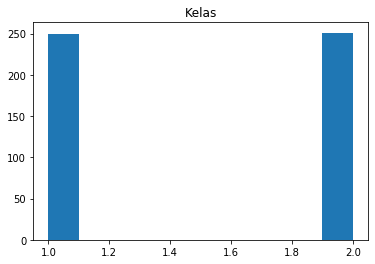

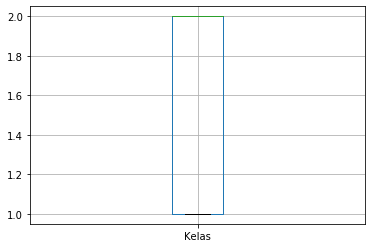

In [50]:
# Kelas
pylt.figure()

# Histogram
pylt.hist(datacsv["Kelas"])
pylt.title("Kelas")
pylt.show()

# Box Plot
datacsv.boxplot(["Kelas"])
pylt.show()

***
Dengan memerhatikan histogram, dapat disimpulkan bahwa frekuensi gandum kelas 1 dan 2 itu sangat simetris. Namun, dapat disimpulkan bahwa distribusi frekuensi dari gandum kelas 1 dan 2 itu tidak sepenuhnya simetris dengan memerhatikan box plot. 
***

Hal ini dapat kami lihat dengan memerhatikan bahwa garis median box plot tidak berada pada tengah "box", melainkan di salah satu ujungnya. Dengan mereferensi tabel median, dapat kita tentukan bahwa median untuk kolom kelas bernilai 2. Ini berarti bahwa ada lebih banyak gandum kelas 2 dalam data. Ini selaras dengan nilai modus kolom yang menunjukkan bahwa ada lebih banyak gandum kelas 2 dalam data. Namun, histogram juga menunjukkan bahwa jumlah gandum kelas 1 dan kelas 2 itu hampir sama. Dalam kondisi praktis, ini dapat memberikan dua kesimpulan berdasarkan kualitas kelas 1 dan 2: jika kelas 1 adalah kelas dengan kualitas bagus, maka data ini menunjukkan kekurangan kualitas dalam pertumbuhan gandum; dan sebaliknya.

c:\users\benidictus\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\benidictus\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\benidictus\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code

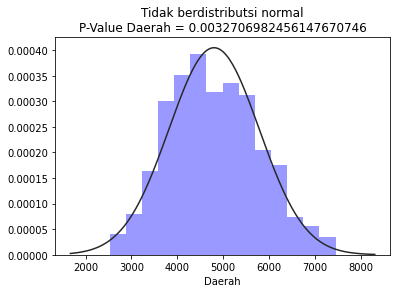

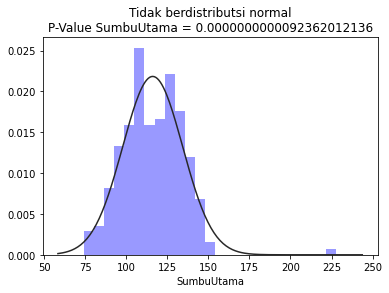

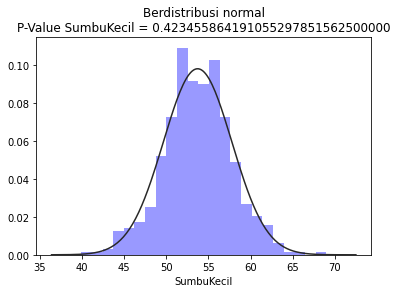

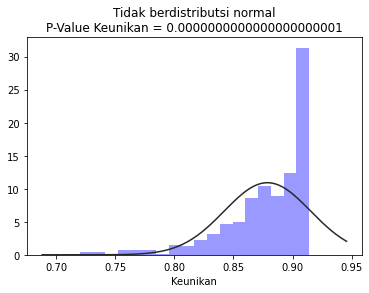

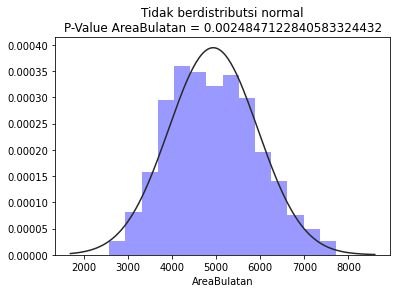

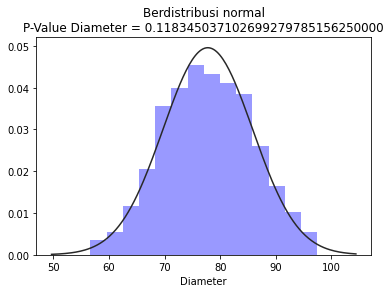

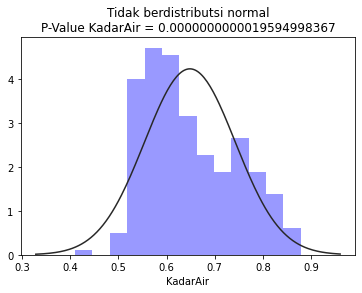

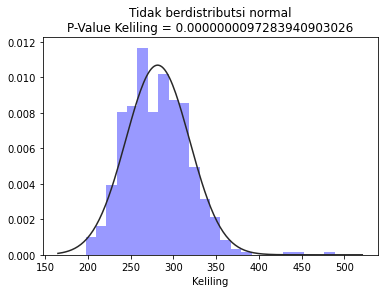

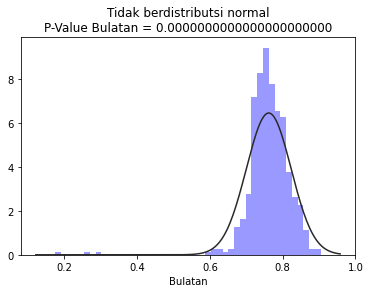

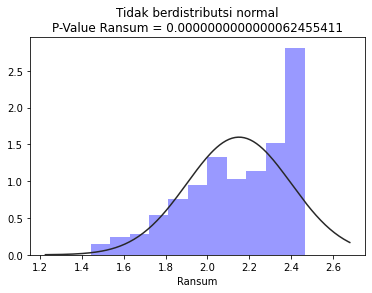

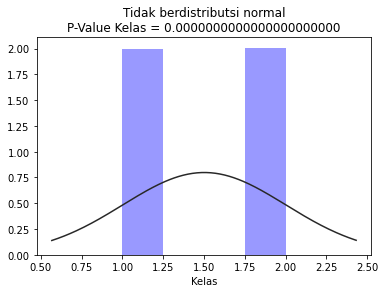

In [17]:
# Soal 3

### Keterkaitan dengan boxplot ######################################################
# Tabel akan berdistribusi normal jika:
# 1. Tidak ada titik pada diagram boxplot, gambar box harus tepat ditengah
# 2. Terdapat titik pada diagram boxplot, gambar box harus berada lebih condong
#    ke titik - titik yang lebih banyak. cth: SumbuKecil
# 
# Khusus untuk diagram Kelas tidak termasuk distribusi normal karena
# penyebaran nilai distribusinya tidak seimbang dan terlalu tinggi di satu nilai
#
###

for line in datacsv:
    pylt.figure()
    sns.distplot(datacsv[line], fit = norm, kde = False, hist = True, color = 'blue')
    
    # jika nilai P value lebih besar dari 0.05
    if(shapiro(datacsv[line])[1] > 0.05):
        pylt.title("Berdistribusi normal\n" + "P-Value " + line + " = " + str("%0.30f" %shapiro(datacsv[line])[1]))
    else:
        pylt.title("Tidak berdistributsi normal\n" + "P-Value " + line + " = " + str("%0.22f" %shapiro(datacsv[line])[1]))

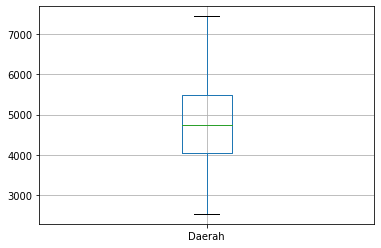

H0: miu = miu0
H1: miu > miu0
Tingkat signifikan = 0.05
Daerah kritis : 2.2951538242525173 > 1.64
z = 2.295
pVal = 0.011
Keputusan : Hipotesis H0 ditolak


In [165]:
# Soal 4
# a

# alpha
A = 0.05

miu0 = 4700
zA = 1.64

miu1 = datacsv['Daerah'].mean()
sd = datacsv['Daerah'].std()
n = len(datacsv.index)

z = (miu1 - miu0)/ (sd/math.sqrt(n))

datacsv.boxplot(['Daerah'])
pylt.show()

print("H0: miu = miu0")
print("H1: miu > miu0")
print("Tingkat signifikan = " + str(A))
print("Daerah kritis : ", end = '')
print(str(z) + " > " + str(zA))

pVal = norm.sf(abs(z))
print("z = %.3f" % z)
print("pVal = %.3f" % pVal)
print("Keputusan : ", end = '')

if(z > zA):
    print("Hipotesis H0 ditolak")
else:
    print("Hipotesis H0 diterima")

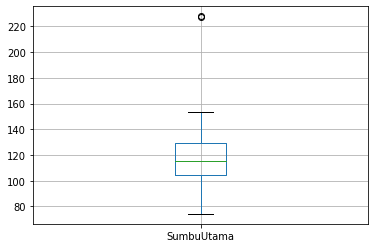

H0: miu = miu0
H1: miu <> miu0
Tingkat signifikan = 0.025
Daerah kritis : 0.05524712326731844 < -1.96 atau 0.05524712326731844 > 1.96
z = 0.055
pVal = 0.478
Keputusan : Hipotesis H0 diterima


In [168]:
# b
miu0 = 116
A = 0.025
zA = 1.96

miu1 = datacsv['SumbuUtama'].mean()
sd = datacsv['SumbuUtama'].std()
n = len(datacsv.index)

z = (miu1 - miu0)/ (sd/math.sqrt(n))

datacsv.boxplot(['SumbuUtama'])
pylt.show()

print("H0: miu = miu0")
print("H1: miu <> miu0")
print("Tingkat signifikan = " + str(A))
print("Daerah kritis : ", end = '')
print(str(z) + " <" + " -" + str(zA) + " atau " + str(z) + " > " + str(zA))
pVal = norm.sf(abs(z))
print("z = %.3f" % z)
print("pVal = %.3f" % pVal)
print("Keputusan : ", end = '')

if(z < -zA or z > zA):
    print("Hipotesis H0 ditolak")
else:
    print("Hipotesis H0 diterima")

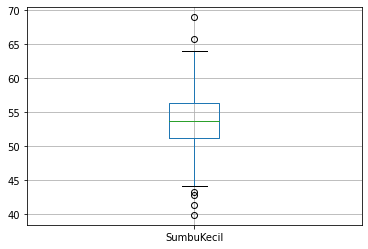

H0: miu = miu0
H1: miu <> miu0
Tingkat signifikan = 0.025
Daerah kritis : 6.6464610699610045 < -1.96 atau 6.6464610699610045 > 1.96
z = 6.646
pVal = 0.000
Keputusan : Hipotesis H0 ditolak


In [169]:
# c 
sample = []
sample = datacsv['SumbuKecil'][:20]

miu0 = 50
A = 0.025
zA = 1.96

hasil = sum(sample)
n = 20
miu1 = hasil/n
sd = np.std(sample)
z = (miu1 - miu0)/ (sd/math.sqrt(n))


datacsv.boxplot(['SumbuKecil'])
pylt.show()

print("H0: miu = miu0")
print("H1: miu <> miu0")
print("Tingkat signifikan = " + str(A))
print("Daerah kritis : ", end = '')
print(str(z) + " <" + " -" + str(zA) + " atau " + str(z) + " > " + str(zA))
pVal = norm.sf(abs(z))
print("z = %.3f" % z)
print("pVal = %.3f" % pVal)
print("Keputusan : ", end = '')

if(z < -zA or z > zA):
    print("Hipotesis H0 ditolak")
else:
    print("Hipotesis H0 diterima")

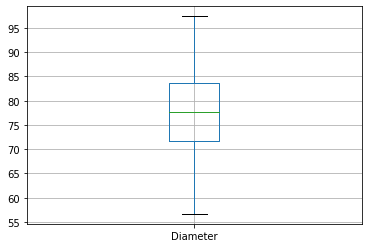

H0: p = p0
H1: p <> p0
Tingkat signifikan = 0.025
Daerah kritis : 2.7553868807746578 < -1.96 atau 2.7553868807746578 > 1.96
z = 2.755
pVal = 0.0029
Keputusan : Hipotesis H0 ditolak


In [171]:
# d
sample = []

for line in datacsv['Diameter']:
    if(line > 85): 
        sample.append(line)

p0 = 0.15
a = 0.025
zA = 1.96
x = len(sample)
n = len(datacsv.index)
temp = n * p0 * (1 - p0)

z = (x - (n*p0))/math.sqrt(temp)


datacsv.boxplot(['Diameter'])
pylt.show()

## binomial didekati normal
print("H0: p = p0")
print("H1: p <> p0")
print("Tingkat signifikan = " + str(A))
print("Daerah kritis : ", end = '')
print(str(z) + " <" + " -" + str(zA) + " atau " + str(z) + " > " + str(zA))
pVal = norm.sf(abs(z))
print("z = %.3f" % z)
print("pVal = %.4f" % pVal)
print("Keputusan : ", end = '')

if(z < -zA or z > zA):
    print("Hipotesis H0 ditolak")
else:
    print("Hipotesis H0 diterima")

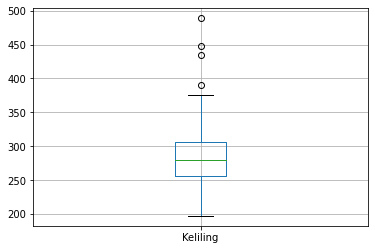

H0: p = p0
H1: p < p0
Tingkat signifikan = 0.025
Daerah kritis : -5.129891760425771 < -1.96
z = -5.130
pVal = 0.000000144954414
Keputusan : Hipotesis H0 ditolak


In [172]:
# e
sample = []

for line in datacsv['Keliling']:
    if(line < 100): 
        sample.append(line)

p0 = 0.05
a = 0.025
zA = 1.96
x = len(sample)
n = len(datacsv.index)
temp = n * p0 * (1 - p0)

z = (x - (n*p0))/math.sqrt(temp)

datacsv.boxplot(['Keliling'])
pylt.show()

## binomial didekati normal
print("H0: p = p0")
print("H1: p < p0")
print("Tingkat signifikan = " + str(A))
print("Daerah kritis : ", end = '')
print(str(z) + " <" + " -" + str(zA))
pVal = norm.sf(abs(z))
print("z = %.3f" % z)
print("pVal = %.15f" % pVal)
print("Keputusan : ", end = '')

if(z < -zA):
    print("Hipotesis H0 ditolak")
else:
    print("Hipotesis H0 diterima")

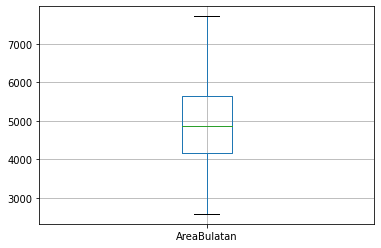

H0: miu1 - miu2 = d0
H1: miu1 - miu2 <> d0
Tingkat signifikan = 0.025
Daerah kritis : 17.04716514145827 < -1.96 atau 17.04716514145827 > 1.96
z = 17.047
pVal = 0.000000000000000
Keputusan : Hipotesis H0 ditolak


In [173]:
# Soal 5
# a
sample1 = []
sample2 = []
i = 0

for line in datacsv['AreaBulatan']:
    if(i < 250):
        sample1.append(line)
    else:
        sample2.append(line)
    i += 1

a = 0.025
zA = 1.96
miu1 = np.mean(sample1)
miu2 = np.mean(sample2)
d0 = 0

sd1 = np.std(sample1)
sd2 = np.std(sample2)
n1 = len(sample1)
n2 = len(sample2)
temp = (sd1**(2)/n1) + (sd2**(2)/n2)

z = ((miu1 - miu2) - d0)/math.sqrt(temp)

datacsv.boxplot(['AreaBulatan'])
pylt.show()

## 
print("H0: miu1 - miu2 = d0")
print("H1: miu1 - miu2 <> d0")
print("Tingkat signifikan = " + str(A))
print("Daerah kritis : ", end = '')
print(str(z) + " <" + " -" + str(zA) + " atau " + str(z) + " > " + str(zA))
pVal = norm.sf(abs(z))
print("z = %.3f" % z)
print("pVal = %.15f" % pVal)
print("Keputusan : ", end = '')

if(z < -zA or z > zA):
    print("Hipotesis H0 ditolak")
else:
    print("Hipotesis H0 diterima")

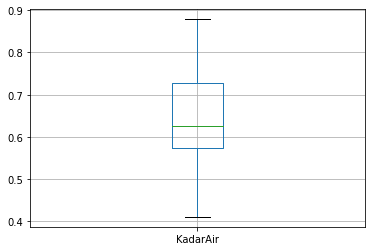

H0: miu1 - miu2 = d0
H1: miu1 - miu2 <> d0
Tingkat signifikan = 0.025
Daerah kritis : -26.957413098868866 < -1.96 atau -26.957413098868866 > 1.96
z = -26.957
pVal = 0.000000000000000
Keputusan : Hipotesis H0 ditolak


In [174]:
# b
sample1 = []
sample2 = []
i = 0

for line in datacsv['KadarAir']:
    if(i < 250):
        sample1.append(line)
    else:
        sample2.append(line)
    i += 1

a = 0.025
zA = 1.96
miu1 = np.mean(sample1)
miu2 = np.mean(sample2)
d0 = 0.2

sd1 = np.std(sample1)
sd2 = np.std(sample2)
n1 = len(sample1)
n2 = len(sample2)
temp = ((sd1**(2)/n1)) + (sd2**(2)/n2)

z = ((miu1 - miu2) - d0)/temp**(0.5)

datacsv.boxplot(['KadarAir'])
pylt.show()

## 
print("H0: miu1 - miu2 = d0")
print("H1: miu1 - miu2 <> d0")
print("Tingkat signifikan = " + str(A))
print("Daerah kritis : ", end = '')
print(str(z) + " <" + " -" + str(zA) + " atau " + str(z) + " > " + str(zA))
pVal = norm.sf(abs(z))
print("z = %.3f" % z)
print("pVal = %.15f" % pVal)
print("Keputusan : ", end = '')

if(z < -zA or z > zA):
    print("Hipotesis H0 ditolak")
else:
    print("Hipotesis H0 diterima")

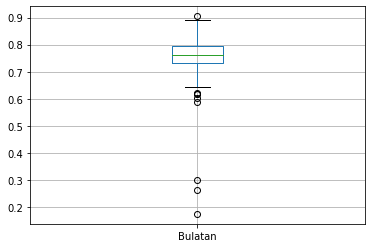

H0: miu1 - miu2 = d0
H1: miu1 - miu2 <> d0
Tingkat signifikan = 0.025
Daerah kritis : -3.4670136085431045 < -1.96 atau -3.4670136085431045 > 1.96
z = -3.467
pVal = 0.000263137622579
Keputusan : Hipotesis H0 ditolak


In [175]:
# c
sample1 = []
sample2 = []
i = 0

for line in datacsv['Bulatan']:
    if(i < 20):
        sample1.append(line)
    i += 1

j = 0
for line in datacsv['Bulatan']:
    if(j > 479 and j < 500):
        sample2.append(line)
    j += 1

a = 0.025
zA = 1.96
miu1 = np.mean(sample1)
miu2 = np.mean(sample2)
d0 = 0

sd1 = np.std(sample1)
sd2 = np.std(sample2)
n1 = len(sample1)
n2 = len(sample2)
temp = ((sd1**(2)/n1)) + (sd2**(2)/n2)

z = ((miu1 - miu2) - d0)/temp**(0.5)

datacsv.boxplot(['Bulatan'])
pylt.show()

print("H0: miu1 - miu2 = d0")
print("H1: miu1 - miu2 <> d0")
print("Tingkat signifikan = " + str(A))
print("Daerah kritis : ", end = '')
print(str(z) + " <" + " -" + str(zA) + " atau " + str(z) + " > " + str(zA))
pVal = norm.sf(abs(z))
print("z = %.3f" % z)
print("pVal = %.15f" % pVal)
print("Keputusan : ", end = '')

if(z < -zA or z > zA):
    print("Hipotesis H0 ditolak")
else:
    print("Hipotesis H0 diterima")

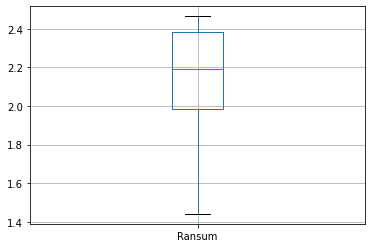

z = 13.397
pVal = 0.000
H0: miu1 - miu2 = d0
H1: miu1 - miu2 > d0
Tingkat signifikan = 0.05
Daerah kritis : 13.397486455610238 > 1.64
z = 13.397
pVal = 0.000000000000000
Keputusan : Hipotesis H0 ditolak


In [176]:
# d
sample1 = []
sample2 = []
i = 0

for line in datacsv['Ransum']:
    if(i < 250):
        sample1.append(line)
    else:
        sample2.append(line)
    i += 1

proporsi1 = []
proporsi2 = []
    
for line in sample1:
    if(line > 2):
        proporsi1.append(line)
        
for line in sample2:
    if(line > 2):
        proporsi2.append(line)
        
A = 0.05
zA = 1.64
        
x1 = len(proporsi1)
x2 = len(proporsi2)

n1 = len(sample1)
n2 = len(sample2)

p1 = x1 / n1
p2 = x2 / n2
pt = (x1 + x2) / (n1 + n2)
qt = 1 - pt

z = (p1 - p2)/(pt*qt*((1/n1) + (1/n2)))**(0.5)

datacsv.boxplot(['Ransum'])
pylt.show()

pVal = norm.sf(abs(z))
print("z = %.3f" % z)
print("pVal = %.3f" % pVal)

print("H0: miu1 - miu2 = d0")
print("H1: miu1 - miu2 > d0")
print("Tingkat signifikan = " + str(A))
print("Daerah kritis : ", end = '')
print(str(z) + " > " + str(zA))
pVal = norm.sf(abs(z))
print("z = %.3f" % z)
print("pVal = %.15f" % pVal)
print("Keputusan : ", end = '')

if(z > zA):
    print("Hipotesis H0 ditolak")
else:
    print("Hipotesis H0 diterima")

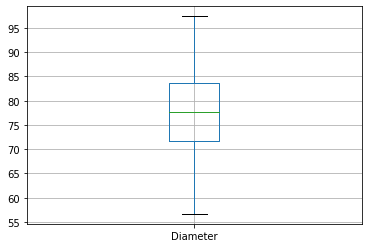

H0: var1 = var2
H1: var1 <> var2
Tingkat signifikan = 0.05
Daerah kritis : 1.083878022042188 < -1.2827228078241388 atau 1.083878022042188 > 0.7795916576054985
f = 1.083878022042188


AttributeError: 'numpy.float64' object has no attribute 'ppf'

In [185]:
# e
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as pylt
import seaborn as sns
from scipy.stats import *
import math

sample1 = []
sample2 = []
i = 0

for line in datacsv['Diameter']:
    if(i < 250):
        sample1.append(line)
    else:
        sample2.append(line)
    i += 1

a = 0.025
s1 = np.var(sample1)
s2 = np.var(sample2)
v1 = len(sample1) - 1
v2 = len(sample2) - 1

fA1 = f.ppf(q=1-0.025, dfn=v1, dfd=v2)
fA2 = f.ppf(q=0.025, dfn=v1, dfd=v2)
f = s1/s2

datacsv.boxplot(['Diameter'])
pylt.show()

## Distribusi F
print("H0: var1 = var2")
print("H1: var1 <> var2")
print("Tingkat signifikan = " + str(A))
print("Daerah kritis : ", end = '')
print(str(f) + " <" + " -" + str(fA1) + " atau " + str(f) + " > " + str(fA2))
print("f = %.15f" % f)
print("Keputusan : ", end = '')
if(f < fA1 or f > fA2):
    print("Hipotesis H0 ditolak")
else:
    print("Hipotesis H0 diterima")

Nilai korelasi Daerah dengan Kelas = -0.60
moderate negative linear relationship

Nilai korelasi SumbuUtama dengan Kelas = -0.71
strong negative linear relationship

Nilai korelasi SumbuKecil dengan Kelas = -0.15
weak negative linear relationship

Nilai korelasi Keunikan dengan Kelas = -0.73
strong negative linear relationship

Nilai korelasi AreaBulatan dengan Kelas = -0.61
moderate negative linear relationship

Nilai korelasi Diameter dengan Kelas = -0.60
moderate negative linear relationship

Nilai korelasi KadarAir dengan Kelas = 0.13
weak positive linear relationship

Nilai korelasi Keliling dengan Kelas = -0.63
moderate negative linear relationship

Nilai korelasi Bulatan dengan Kelas = 0.55
moderate positive linear relationship

Nilai korelasi Ransum dengan Kelas = -0.84
strong negative linear relationship

Nilai korelasi Kelas dengan Kelas = 1.00
perfect positive linear relationship



<Figure size 432x288 with 0 Axes>

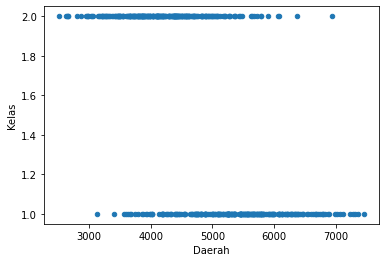

<Figure size 432x288 with 0 Axes>

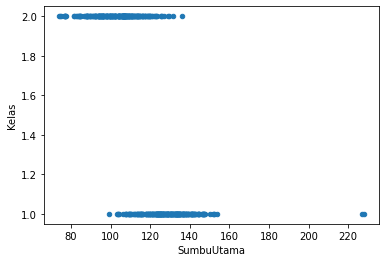

<Figure size 432x288 with 0 Axes>

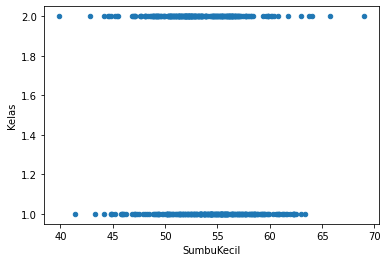

<Figure size 432x288 with 0 Axes>

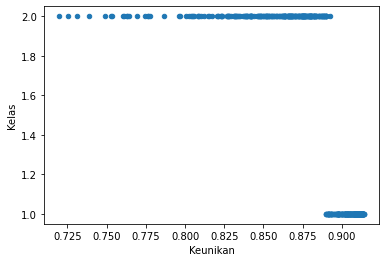

<Figure size 432x288 with 0 Axes>

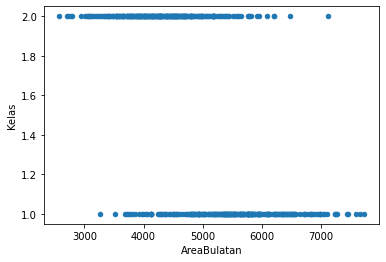

<Figure size 432x288 with 0 Axes>

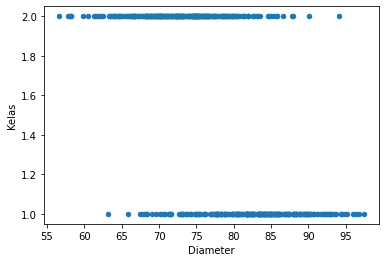

<Figure size 432x288 with 0 Axes>

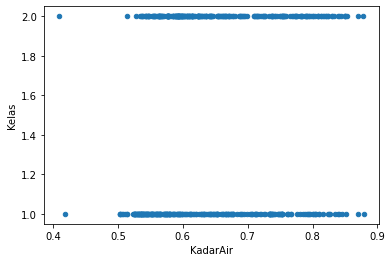

<Figure size 432x288 with 0 Axes>

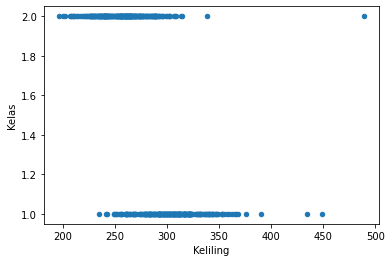

<Figure size 432x288 with 0 Axes>

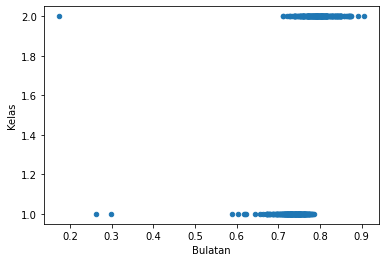

<Figure size 432x288 with 0 Axes>

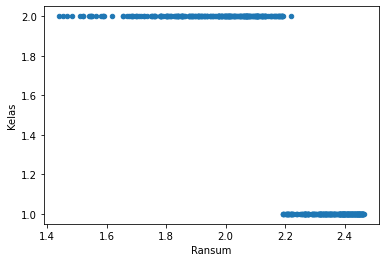

<Figure size 432x288 with 0 Axes>

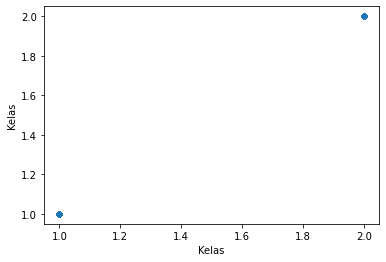

In [12]:
# Soal 6
for column in datacsv:
    pylt.figure()
    
    # menghitung nilai data korelasi
    temp = datacsv[column].corr(datacsv["Kelas"])
    
    print("Nilai korelasi", column, "dengan Kelas = %.2f" % temp)
    
    if(temp == 0):
        print("no linear relationship")
    elif(temp > 0):
        if(temp == 1):
            print("perfect positive linear relationship")
        elif(temp < 1 and temp >= 0.7):
            print("strong positive linear relationship")
        elif(temp < 0.7 and temp >= 0.3):
            print("moderate positive linear relationship")
        elif(temp < 0.3 and temp > 0):
            print("weak positive linear relationship")
    else:
        if(temp == -1):
            print("perfect negative linear relationship")
        elif(temp > -1 and temp <= -0.7):
            print("strong negative linear relationship")
        elif(temp > -0.7 and temp <= -0.3):
            print("moderate negative linear relationship")
        elif(temp > -0.3 and temp < 0):
            print("weak negative linear relationship")
    print()
    
    # membuat grafik plotnya
    datacsv.plot(kind="scatter", x=column, y="Kelas")